In [1]:
# import necessary libraries for now
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import plotly.graph_objects as go


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
# reading data
df= pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


next i will just explore categorical data

In [3]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [4]:
df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [5]:
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [6]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [7]:
# checking nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


i will remove millage column as km_driven has no nulls 

In [8]:
df.drop('mileage',axis=1,inplace= True)

In [9]:
df2 = df.copy()
df2.engine = df2.engine.fillna(0)

In [10]:
df2[df2.engine==0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,0,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,0,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,0,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,0,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,0,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,0,NaN,NaN,NaN


looks like nulls are in the same rows ,so i will drop them 

In [11]:
df.dropna(inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   engine         7906 non-null   object 
 9   max_power      7906 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.0+ KB


In [13]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


now we have a clean data

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
df['age']=2023-df['year']
df.drop('year',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   engine         7906 non-null   object 
 8   max_power      7906 non-null   object 
 9   torque         7906 non-null   object 
 10  seats          7906 non-null   float64
 11  age            7906 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 803.0+ KB


In [16]:
df.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

diesel and petrol are the most used fuel

### visualization


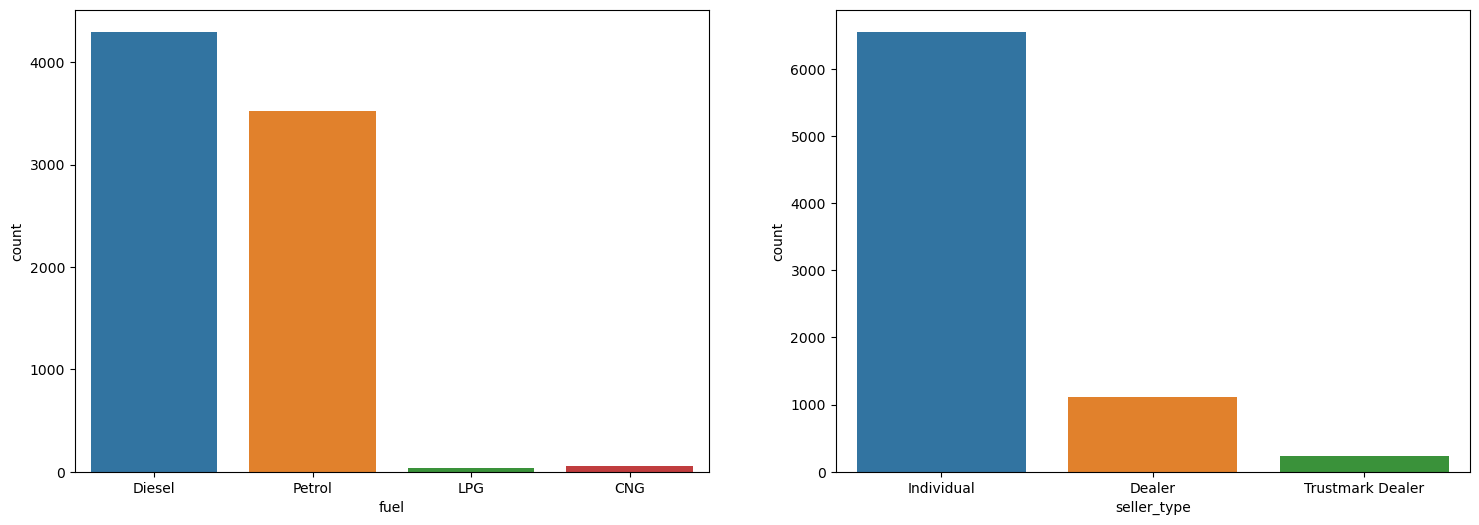

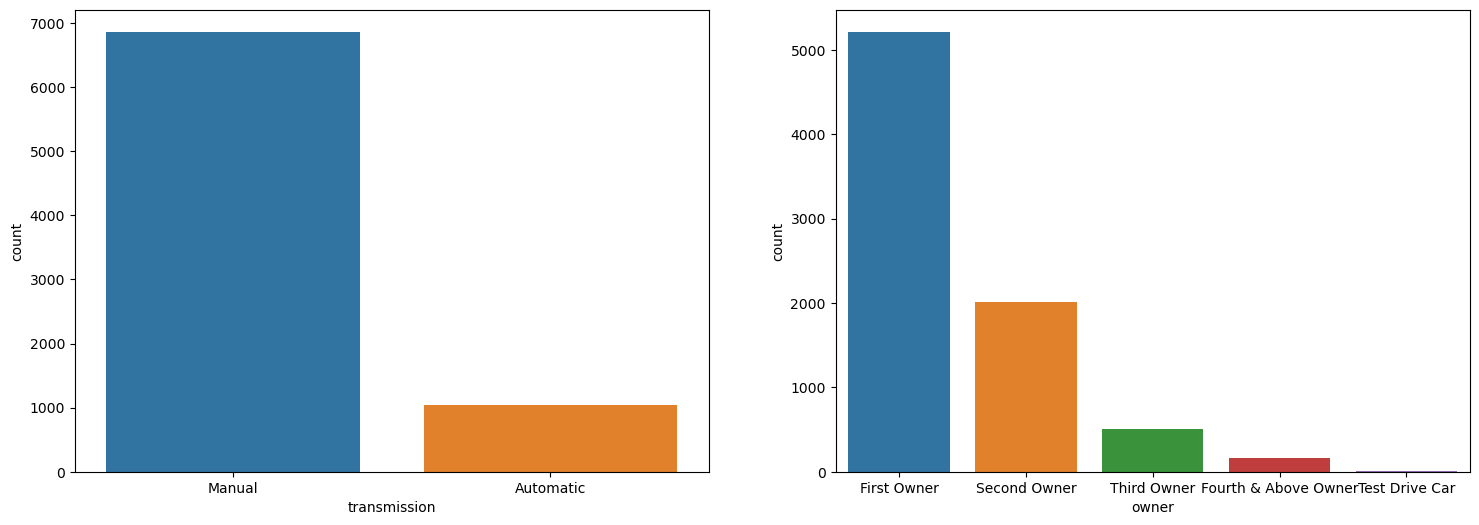

In [17]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[18,6])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

# fuel
most of cars are using diesel and the second place is petrol

# seller type
most of seller are individuals


# transmission
most of cars has manual transmission

# owner 
most of owners are first owners

In [18]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

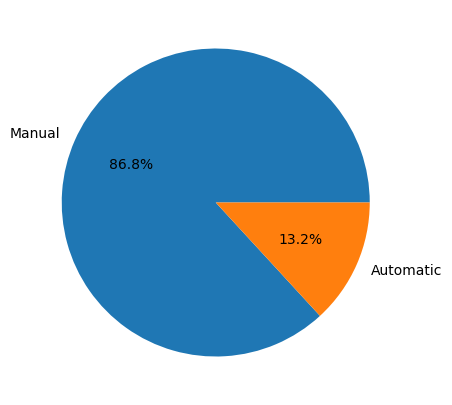

In [19]:
plt.figure(figsize=(15,5))
plt.pie(df.transmission.value_counts(),labels=['Manual','Automatic'],autopct='%1.1f%%')
plt.show()

In [20]:
df.head(1)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9


<Axes: xlabel='seats', ylabel='count'>

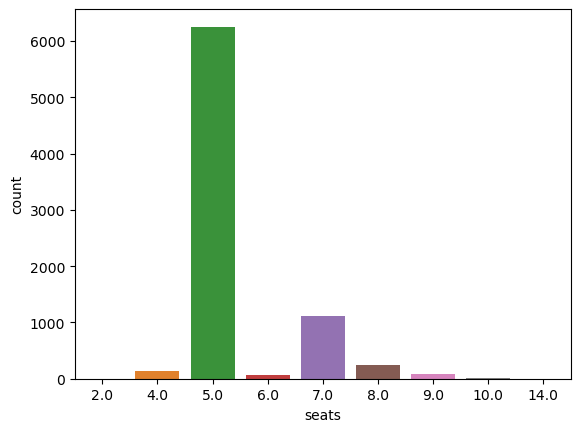

In [21]:
sns.countplot(x='seats',data=df)

<Axes: xlabel='age', ylabel='count'>

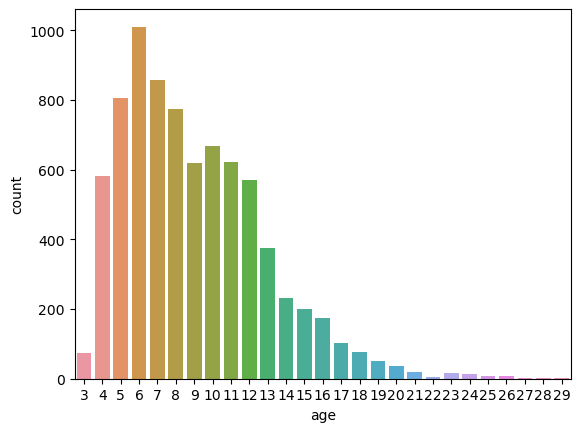

In [22]:
sns.countplot(x='age',data=df)

In [23]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16


In [24]:
df.engine.dtype

dtype('O')

In [25]:
def convert_engine_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the CC
    try:
        return float(x)
    except:
        return None

In [26]:
df.engine=df.engine.apply(convert_engine_to_num)

<Axes: xlabel='engine', ylabel='Density'>

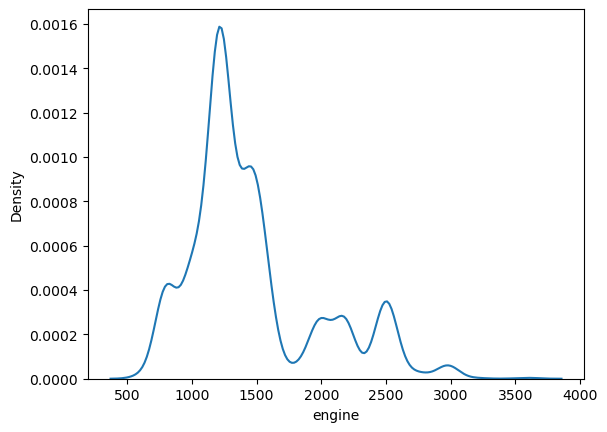

In [27]:
#plt.figure(figsize=(15,25))
sns.kdeplot(x='engine',data=df)

average engine capcity is bet(1000 to 1800)

In [28]:
def convert_maxpowers_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the CC
    try:
        return float(x)
    except:
        return None

In [29]:
df.max_power=df.max_power.apply(convert_maxpowers_to_num)

<Axes: xlabel='max_power', ylabel='Density'>

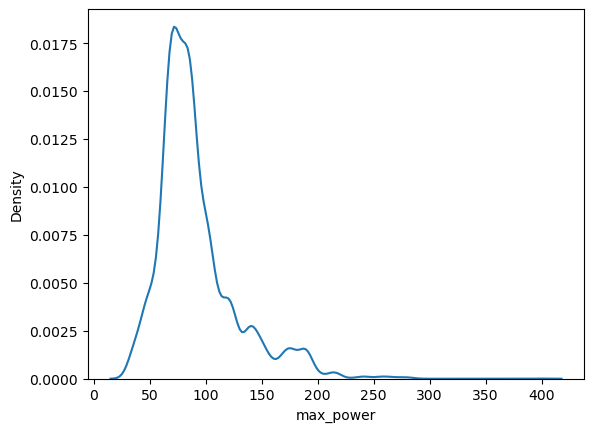

In [30]:
sns.kdeplot(x='max_power',data=df)

most max power is bet (50 to 110)

<Axes: xlabel='selling_price'>

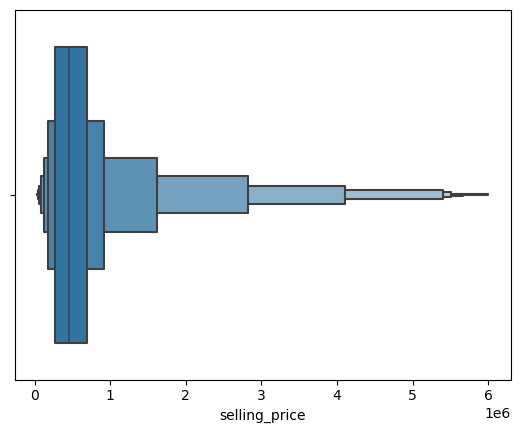

In [31]:
sns.boxenplot(x='selling_price',data=df, showfliers=0)

<Axes: xlabel='km_driven'>

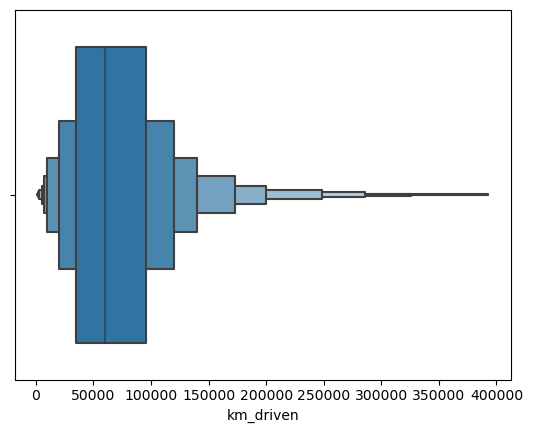

In [32]:
sns.boxenplot(x='km_driven',data=df, showfliers=0)

In [33]:
df.head(1)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.0,190Nm@ 2000rpm,5.0,9


###  preparing data for modeling 

In [34]:
df2=df.copy()

In [35]:
encoder=LabelEncoder()
listname=['fuel','seller_type','transmission','owner']
for i in listname:
    df2[i]=encoder.fit_transform(df2[i])
df2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,1248.0,74.00,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,3,1,1,4,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,3,1,1,0,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16


In [36]:
df2.drop('torque',axis=1,inplace= True)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int32  
 4   seller_type    7906 non-null   int32  
 5   transmission   7906 non-null   int32  
 6   owner          7906 non-null   int32  
 7   engine         7906 non-null   float64
 8   max_power      7906 non-null   float64
 9   seats          7906 non-null   float64
 10  age            7906 non-null   int64  
dtypes: float64(3), int32(4), int64(3), object(1)
memory usage: 617.7+ KB


In [38]:
name_stats = df2['name'].value_counts(ascending=False)
name_stats

Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1982, dtype: int64

In [39]:
name_stats_less_than_5 = name_stats[name_stats<=5]
df2.name = df2.name.apply(lambda x: 'other' if x in name_stats_less_than_5 else x)
len(df2.name.unique())

317

In [41]:
dummies = pd.get_dummies(df2.name)

In [42]:
dummies.drop('other', axis=1,inplace=True)
dummies.shape
df3 = pd.concat([df2 , dummies], axis=1)
df3.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,1248.0,74.00,5.0,...,0,0,0,0,0,0,0,0,0,0
1,other,370000,120000,1,1,1,2,1498.0,103.52,5.0,...,0,0,0,0,0,0,0,0,0,0
2,Honda City 2017-2020 EXi,158000,140000,3,1,1,4,1497.0,78.00,5.0,...,0,0,0,0,0,0,0,0,0,0
3,other,225000,127000,1,1,1,0,1396.0,90.00,5.0,...,0,0,0,0,0,0,0,0,0,0
4,other,130000,120000,3,1,1,0,1298.0,88.20,5.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df3.head(1)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,1248.0,74.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df3.drop('name',axis=1,inplace=True)

In [48]:
df3.head(1)

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,age,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,450000,145500,1,1,1,0,1248.0,74.0,5.0,9,...,0,0,0,0,0,0,0,0,0,0


## assigning feature and target variables

In [61]:
x=df3.drop('selling_price',axis=1)
y=df3.selling_price

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=40)


## modeling

In [67]:
def train (model,model_name):
    model.fit(x_train, y_train)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")


In [68]:
def kfold(model,model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

In [69]:
def r2 (model, model_name):
    score = r2_score(y_test, model.predict(x_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

## linear regression 

In [70]:
lr= LinearRegression()
train(lr,'linear Regression')
kfold(lr,'linear Regression')
r2(lr,'linear Regression')

linear Regression model score on Training data: 87.86577107959928%
linear Regression model score on Testing data: 92.95535586411913%
linear Regression score on cross validation: 88.5303444309868%
R2 Score for linear Regression is 92.95535586411913%


### Random forest regressor

In [71]:
rf = RandomForestRegressor()
train(rf,'RandomForestRegressor')
kfold(rf,'RandomForestRegressor')
r2(rf,'RandomForestRegressor')

RandomForestRegressor model score on Training data: 99.52936254230049%
RandomForestRegressor model score on Testing data: 97.23984023945906%
RandomForestRegressor score on cross validation: 96.55095595306233%
R2 Score for RandomForestRegressor is 97.23984023945906%


### Gradient Boosting Model

In [72]:
gbr=GradientBoostingRegressor()
train(gbr,'Gradient Boosting Regressor')
kfold(gbr,'Gradient Boosting Regressor')
r2(gbr,'Gradient Boosting Regressor')

Gradient Boosting Regressor model score on Training data: 96.7041081167684%
Gradient Boosting Regressor model score on Testing data: 95.86786514764802%
Gradient Boosting Regressor score on cross validation: 94.77621918968482%
R2 Score for Gradient Boosting Regressor is 95.86786514764802%


### KNN

In [74]:
knn = KNeighborsRegressor()
kfold(knn, "KNN")
train(knn, "KNN")
r2(knn, "KNN")

KNN score on cross validation: 79.95324984544199%
KNN model score on Training data: 86.39510635160418%
KNN model score on Testing data: 85.67855024238803%
R2 Score for KNN is 85.67855024238803%


### Decision Tree Regressor

In [75]:
dtr = DecisionTreeRegressor()
kfold(dtr, "Decision Tree")
train(dtr, "Decision Tree")
r2(dtr, "Decision Tree")

Decision Tree score on cross validation: 94.45759712010269%
Decision Tree model score on Training data: 99.98296821543909%
Decision Tree model score on Testing data: 95.34511270069162%
R2 Score for Decision Tree is 95.34511270069162%


### bagging model

In [76]:
br = BaggingRegressor(n_estimators=200, random_state=0)
kfold(br, "Bagging")
train(br, "Bagging")
r2(br, "Bagging")

Bagging score on cross validation: 96.52137849914844%
Bagging model score on Training data: 99.4998798840967%
Bagging model score on Testing data: 97.15703719007568%
R2 Score for Bagging is 97.15703719007568%
